<a href="https://colab.research.google.com/github/FutureOfTed/AI-class/blob/main/Week11/AE_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러옵니다.

df = pd.read_csv('/content/drive/MyDrive/data/creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217919,141095.0,0.871410,1.358728,-2.883496,0.034395,1.371683,-0.842480,-0.083321,-2.960179,-0.817786,...,-1.257191,0.536366,-0.031615,0.593511,0.638153,0.584481,-0.049678,0.150952,0.76,0.0
217920,141095.0,-0.381349,0.765256,0.155371,-0.717721,0.906263,-0.697629,1.523591,-0.319881,-0.335230,...,0.279743,0.844375,-0.365868,-0.432738,0.266463,-0.136894,-0.075330,-0.074753,78.63,0.0
217921,141095.0,-0.864069,1.496245,-0.833361,-1.265346,1.235182,-1.796329,2.156423,-0.956617,0.587187,...,0.007886,0.938044,-0.259363,0.102944,-0.122671,0.047104,0.478381,0.154177,20.50,0.0
217922,141096.0,0.868458,-2.267980,-1.540881,0.307683,0.036354,1.984792,-0.069410,0.474197,0.868664,...,-0.033937,-1.120274,0.042514,-0.950601,-0.971857,0.171367,-0.105728,0.023823,537.28,0.0


In [ ]:
df.shape

(217924, 31)

In [ ]:
# 결측치 홗인

df.isnull().values.any()

np.True_

In [ ]:
LABELS = ["Normal", "Fraud"]

/tmp/ipython-input-2107955042.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


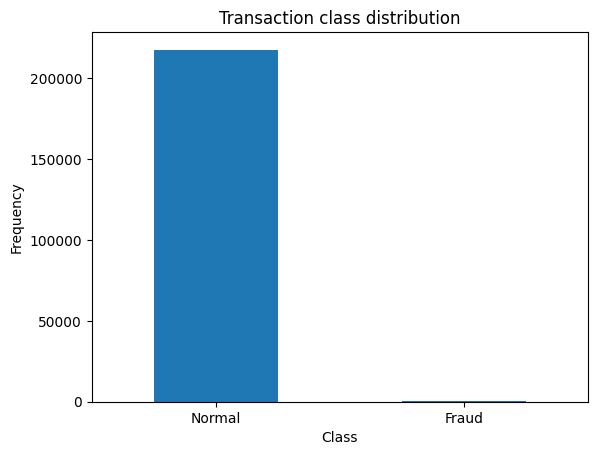

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape

(403, 31)

In [ ]:
normal.shape

(217520, 31)

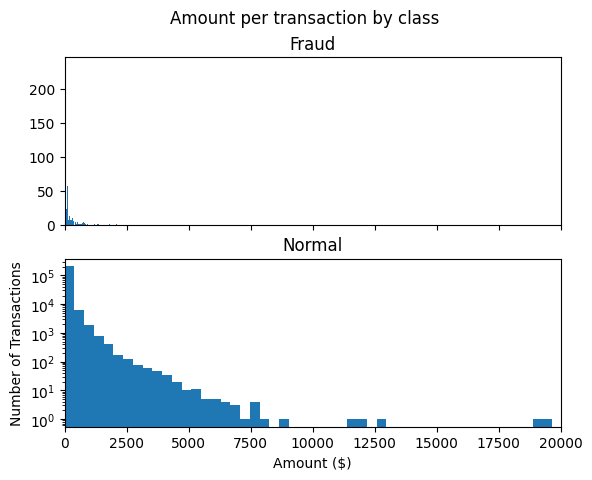

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

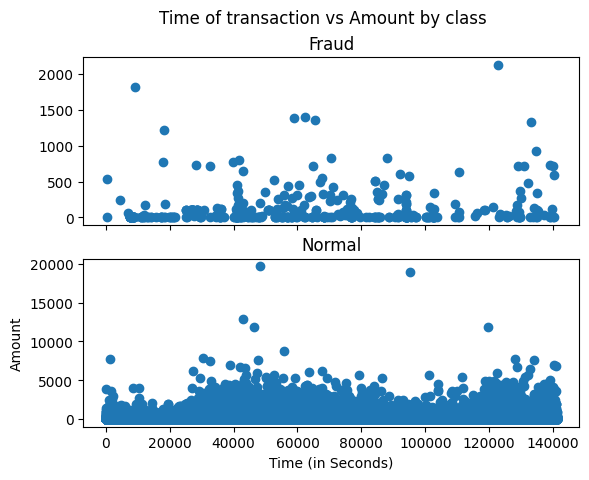

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [ ]:
# 모델을 오직 정상 거래기록으로만 훈련
# 정상 거래기록을 테스트셋에 넣으면 모델의 성능을 평가

In [ ]:
RANDOM_SEED = 42

In [ ]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(174015, 29)

In [ ]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임

In [ ]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [ ]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.1020 - val_loss: 0.9254
Epoch 2/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8901 - val_loss: 0.9014
Epoch 3/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8746 - val_loss: 0.8904
Epoch 4/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8589 - val_loss: 0.8794
Epoch 5/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8557 - val_loss: 0.8742
Epoch 6/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8479 - val_loss: 0.8694
Epoch 7/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8540 - val_loss: 0.8666
Epoch 8/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8268 - val_loss: 0.8646
Epoch 9/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8354 - val_loss: 0.8631
Epoch 10/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8244 - val_loss: 0.8618
Epoch 11/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8397 - val_loss: 0.8607
Epoch 12/50
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

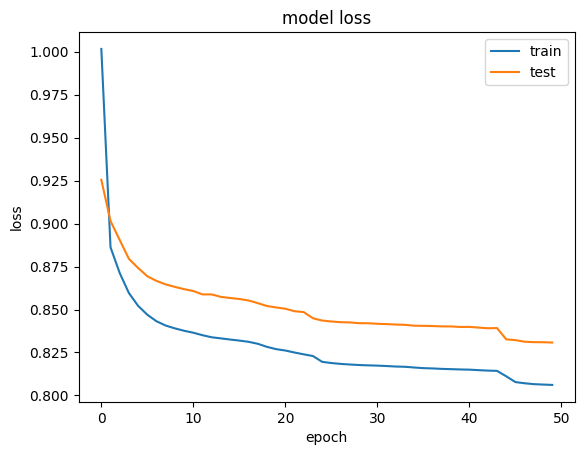

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [ ]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1363/1363 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


,reconstruction_error,true_class
count,43585.000000,43585.000000
mean,0.869392,0.001835
std,3.806430,0.042804
min,0.043458,0.000000
25%,0.256334,0.000000
50%,0.436714,0.000000
75%,0.704372,0.000000
max,160.670882,1.000000


In [ ]:
error_df.head()

,reconstruction_error,true_class
129750,0.415676,0.0
152475,0.395164,0.0
136552,0.742765,0.0
41527,0.416248,0.0
145932,0.436713,0.0


In [ ]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 15

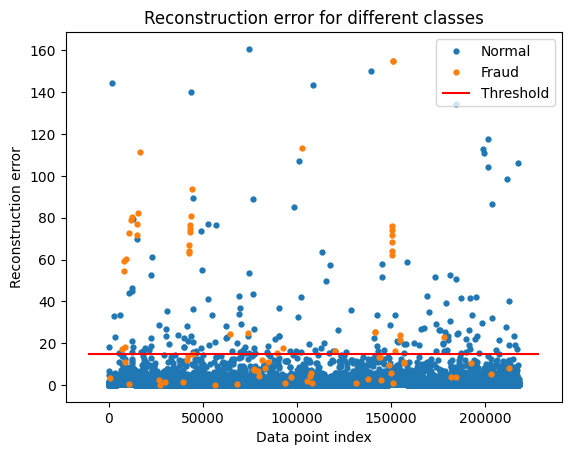

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

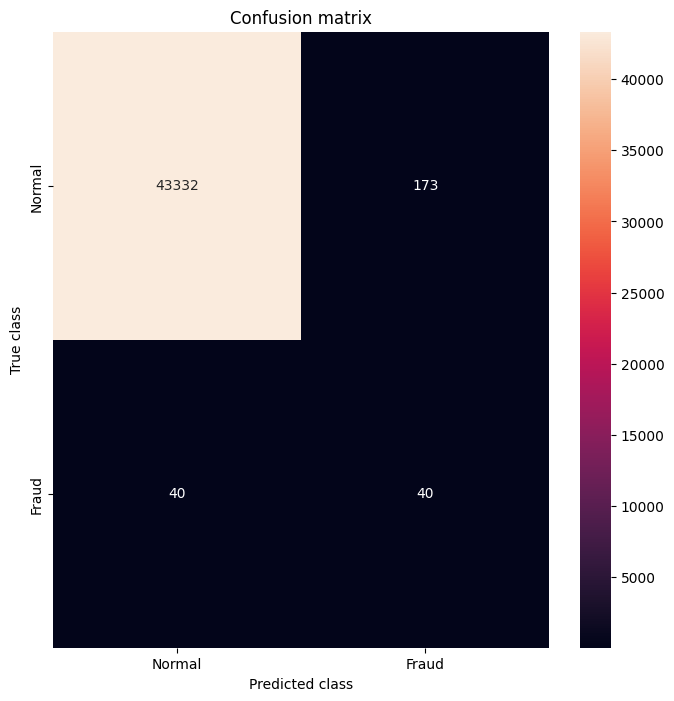

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     43505
         1.0       0.19      0.50      0.27        80

    accuracy                           1.00     43585
   macro avg       0.59      0.75      0.64     43585
weighted avg       1.00      1.00      1.00     43585



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))